# Data exploration

The purpose of this notebook is to explore and visualize data obtained from a digitized image of a fine needle
aspirate (FNA) of a breast mass. The features describe characteristics of the cell nuclei present in the image.

This exploration will help us select relevant features to train an model capable of predicting whether a breast tumor is malignant or benign.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Download dataset

In [2]:
df = pd.read_csv('../data.csv', header=None)

In [3]:
df.head()

0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  
3  0.6638  0.17300  
4  0.2364  0.07678  

[5 rows x 32 columns]

In [4]:
df = df.loc[:, df.columns > 0]

## Get label repartition

[]

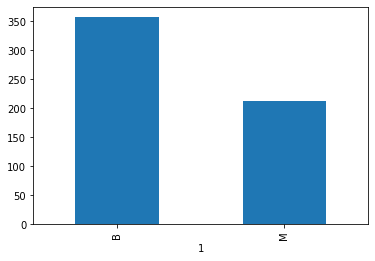

In [5]:
df.groupby([1]).size().plot(kind='bar')
plt.plot()

## Get features metrics

### For all the dataset

In [6]:
df.describe()

2           3           4            5           6   \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    14.127292   19.289649   91.969033   654.889104    0.096360   
std      3.524049    4.301036   24.298981   351.914129    0.014064   
min      6.981000    9.710000   43.790000   143.500000    0.052630   
25%     11.700000   16.170000   75.170000   420.300000    0.086370   
50%     13.370000   18.840000   86.240000   551.100000    0.095870   
75%     15.780000   21.800000  104.100000   782.700000    0.105300   
max     28.110000   39.280000  188.500000  2501.000000    0.163400   

               7           8           9           10          11  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.104341    0.088799    0.048919    0.181162    0.062798  ...   
std      0.052813    0.079720    0.038803    0.027414    0.007060  ...   
min      0.019380    0.000000    0.000000    0.106000    0.049960  ...   
25%      0.064920    0.029560    0.020310    0.161900    0.057700  ...   
50%      0.092630    0.061540    0.033500    0.179200    0.061540  ...   
75%      0.130400    0.130700    0.074000    0.195700    0.066120  ...   
max      0.345400    0.426800    0.201200    0.304000    0.097440  ...   

               22          23          24           25          26  \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    16.269190   25.677223  107.261213   880.583128    0.132369   
std      4.833242    6.146258   33.602542   569.356993    0.022832   
min      7.930000   12.020000   50.410000   185.200000    0.071170   
25%     13.010000   21.080000   84.110000   515.300000    0.116600   
50%     14.970000   25.410000   97.660000   686.500000    0.131300   
75%     18.790000   29.720000  125.400000  1084.000000    0.146000   
max     36.040000   49.540000  251.200000  4254.000000    0.222600   

               27          28          29          30          31  
count  569.000000  569.000000  569.000000  569.000000  569.000000  
mean     0.254265    0.272188    0.114606    0.290076    0.083946  
std      0.157336    0.208624    0.065732    0.061867    0.018061  
min      0.027290    0.000000    0.000000    0.156500    0.055040  
25%      0.147200    0.114500    0.064930    0.250400    0.071460  
50%      0.211900    0.226700    0.099930    0.282200    0.080040  
75%      0.339100    0.382900    0.161400    0.317900    0.092080  
max      1.058000    1.252000    0.291000    0.663800    0.207500  

[8 rows x 30 columns]

### For each feature

In [7]:
df[df[1] == 'B'].describe()

2           3           4           5           6           7   \
count  357.000000  357.000000  357.000000  357.000000  357.000000  357.000000   
mean    12.146524   17.914762   78.075406  462.790196    0.092478    0.080085   
std      1.780512    3.995125   11.807438  134.287118    0.013446    0.033750   
min      6.981000    9.710000   43.790000  143.500000    0.052630    0.019380   
25%     11.080000   15.150000   70.870000  378.200000    0.083060    0.055620   
50%     12.200000   17.390000   78.180000  458.400000    0.090760    0.075290   
75%     13.370000   19.760000   86.100000  551.100000    0.100700    0.097550   
max     17.850000   33.810000  114.600000  992.100000    0.163400    0.223900   

               8           9           10          11  ...          22  \
count  357.000000  357.000000  357.000000  357.000000  ...  357.000000   
mean     0.046058    0.025717    0.174186    0.062867  ...   13.379801   
std      0.043442    0.015909    0.024807    0.006747  ...    1.981368   
min      0.000000    0.000000    0.106000    0.051850  ...    7.930000   
25%      0.020310    0.015020    0.158000    0.058530  ...   12.080000   
50%      0.037090    0.023440    0.171400    0.061540  ...   13.350000   
75%      0.059990    0.032510    0.189000    0.065760  ...   14.800000   
max      0.410800    0.085340    0.274300    0.095750  ...   19.820000   

               23          24           25          26          27  \
count  357.000000  357.000000   357.000000  357.000000  357.000000   
mean    23.515070   87.005938   558.899440    0.124959    0.182673   
std      5.493955   13.527091   163.601424    0.020013    0.092180   
min     12.020000   50.410000   185.200000    0.071170    0.027290   
25%     19.580000   78.270000   447.100000    0.110400    0.112000   
50%     22.820000   86.920000   547.400000    0.125400    0.169800   
75%     26.510000   96.590000   670.000000    0.137600    0.230200   
max     41.780000  127.100000  1210.000000    0.200600    0.584900   

               28          29          30          31  
count  357.000000  357.000000  357.000000  357.000000  
mean     0.166238    0.074444    0.270246    0.079442  
std      0.140368    0.035797    0.041745    0.013804  
min      0.000000    0.000000    0.156600    0.055210  
25%      0.077080    0.051040    0.240600    0.070090  
50%      0.141200    0.074310    0.268700    0.077120  
75%      0.221600    0.097490    0.298300    0.085410  
max      1.252000    0.175000    0.422800    0.148600  

[8 rows x 30 columns]

In [8]:
df[df[1] == 'M'].describe()

2           3           4            5           6   \
count  212.000000  212.000000  212.000000   212.000000  212.000000   
mean    17.462830   21.604906  115.365377   978.376415    0.102898   
std      3.203971    3.779470   21.854653   367.937978    0.012608   
min     10.950000   10.380000   71.900000   361.600000    0.073710   
25%     15.075000   19.327500   98.745000   705.300000    0.094010   
50%     17.325000   21.460000  114.200000   932.000000    0.102200   
75%     19.590000   23.765000  129.925000  1203.750000    0.110925   
max     28.110000   39.280000  188.500000  2501.000000    0.144700   

               7           8           9           10          11  ...  \
count  212.000000  212.000000  212.000000  212.000000  212.000000  ...   
mean     0.145188    0.160775    0.087990    0.192909    0.062680  ...   
std      0.053987    0.075019    0.034374    0.027638    0.007573  ...   
min      0.046050    0.023980    0.020310    0.130800    0.049960  ...   
25%      0.109600    0.109525    0.064620    0.174050    0.056598  ...   
50%      0.132350    0.151350    0.086280    0.189900    0.061575  ...   
75%      0.172400    0.203050    0.103175    0.209850    0.067075  ...   
max      0.345400    0.426800    0.201200    0.304000    0.097440  ...   

               22          23          24           25          26  \
count  212.000000  212.000000  212.000000   212.000000  212.000000   
mean    21.134811   29.318208  141.370330  1422.286321    0.144845   
std      4.283569    5.434804   29.457055   597.967743    0.021870   
min     12.840000   16.670000   85.100000   508.100000    0.088220   
25%     17.730000   25.782500  119.325000   970.300000    0.130475   
50%     20.590000   28.945000  138.000000  1303.000000    0.143450   
75%     23.807500   32.690000  159.800000  1712.750000    0.155975   
max     36.040000   49.540000  251.200000  4254.000000    0.222600   

               27          28          29          30          31  
count  212.000000  212.000000  212.000000  212.000000  212.000000  
mean     0.374824    0.450606    0.182237    0.323468    0.091530  
std      0.170372    0.181507    0.046308    0.074685    0.021553  
min      0.051310    0.023980    0.028990    0.156500    0.055040  
25%      0.244475    0.326425    0.152750    0.276500    0.076302  
50%      0.356350    0.404900    0.182000    0.310300    0.087600  
75%      0.447850    0.556175    0.210675    0.359225    0.102625  
max      1.058000    1.170000    0.291000    0.663800    0.207500  

[8 rows x 30 columns]

### Find some features for which the repartition is homogeneous between both labels

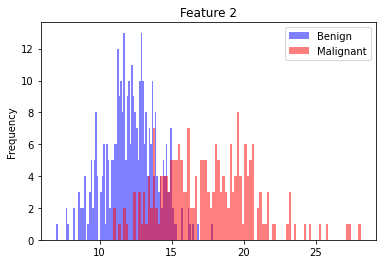

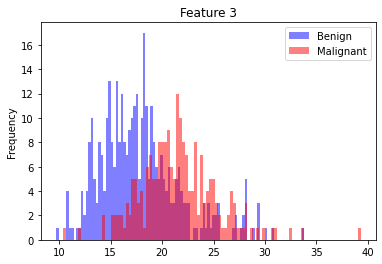

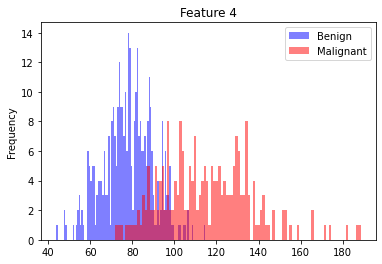

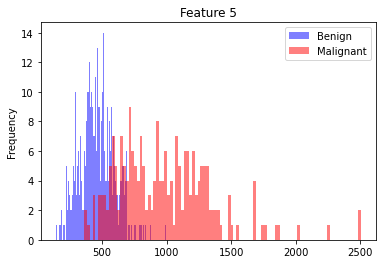

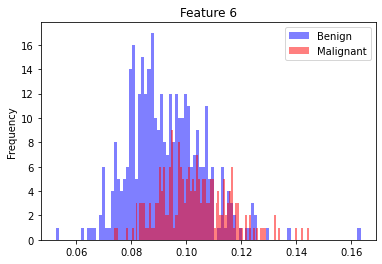

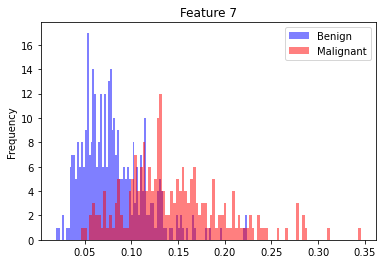

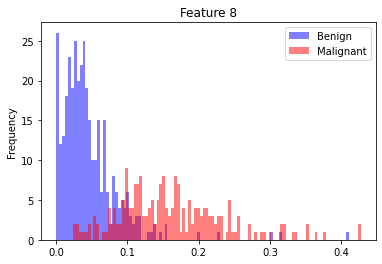

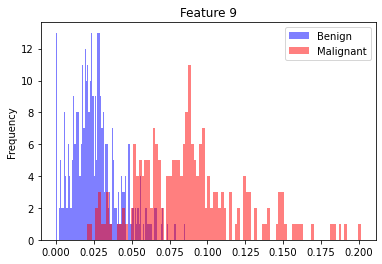

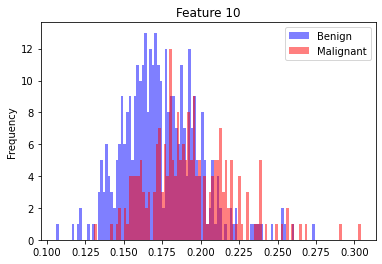

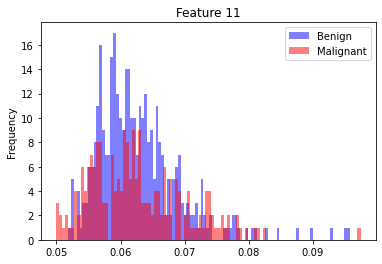

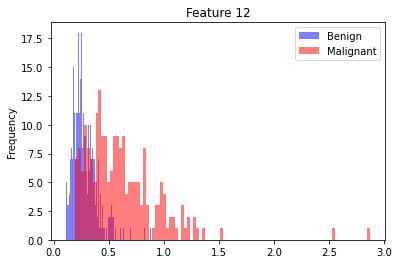

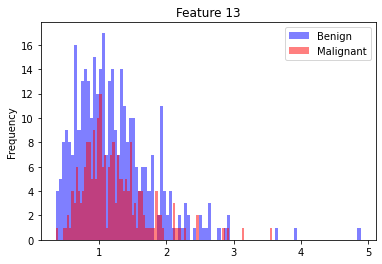

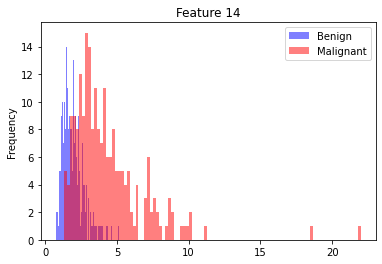

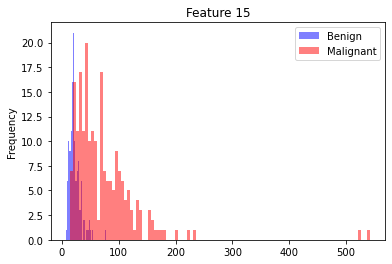

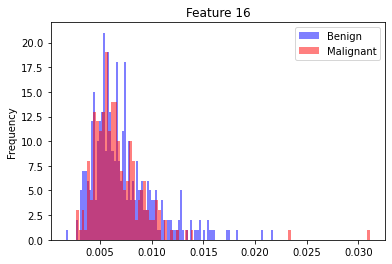

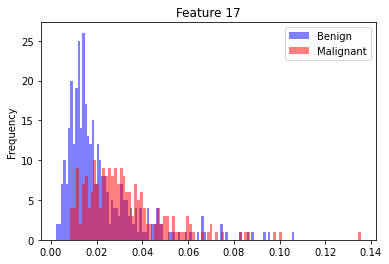

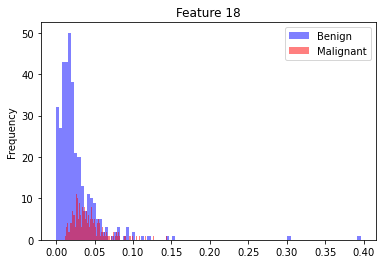

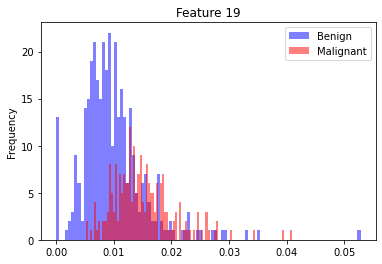

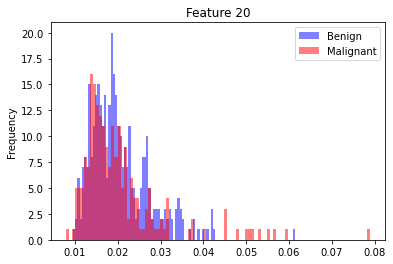

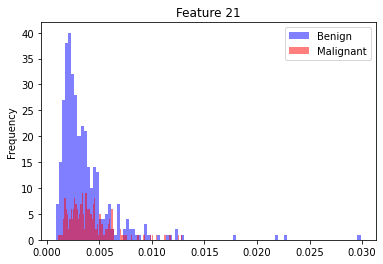

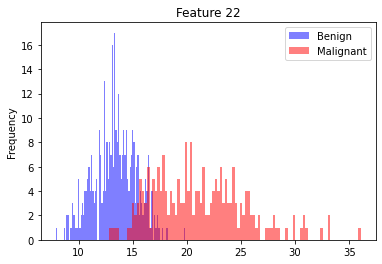

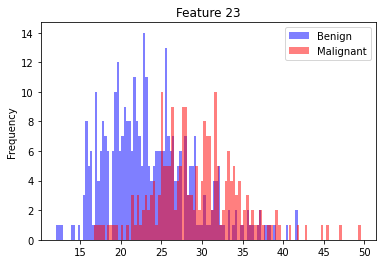

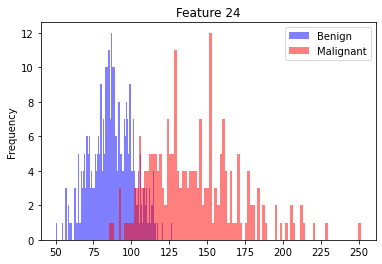

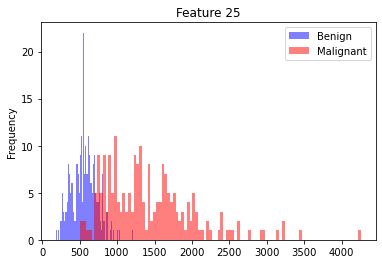

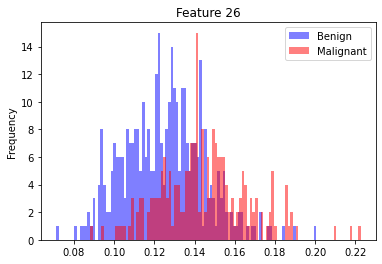

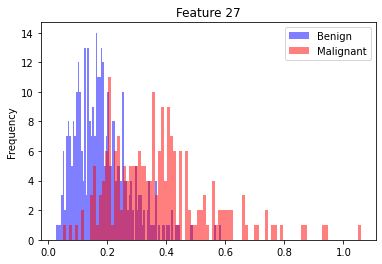

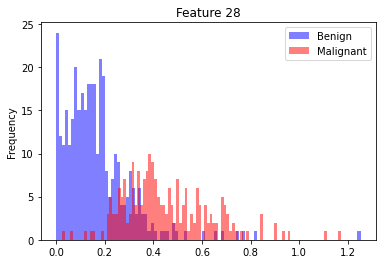

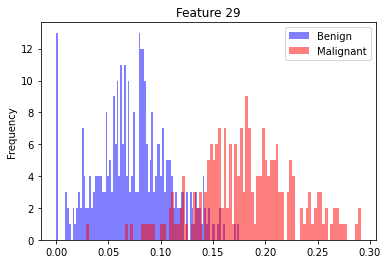

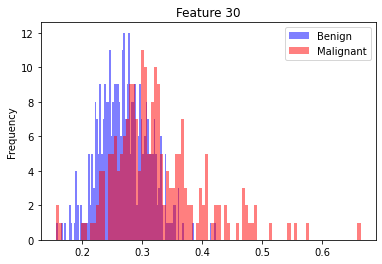

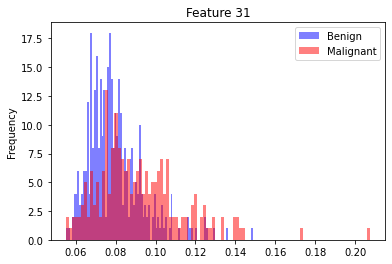

In [9]:
for col in df.loc[:, df.columns > 1].columns:
    df[df[1] == 'B'][col].plot.hist(alpha=0.5,color='blue',bins=100)
    df[df[1] == 'M'][col].plot.hist(alpha=0.5,color='red',bins=100)
    plt.legend(['Benign', 'Malignant'])
    plt.title('Feature ' + str(col))
    plt.show()

It looks like it will be hard to discriminate between both labels with the following features (as the repartition is homogeneous):
- 6
- 10
- 11
- 13
- 16
- 17
- 18
- 19
- 20
- 21
- 26
- 31

### Find some correlated features

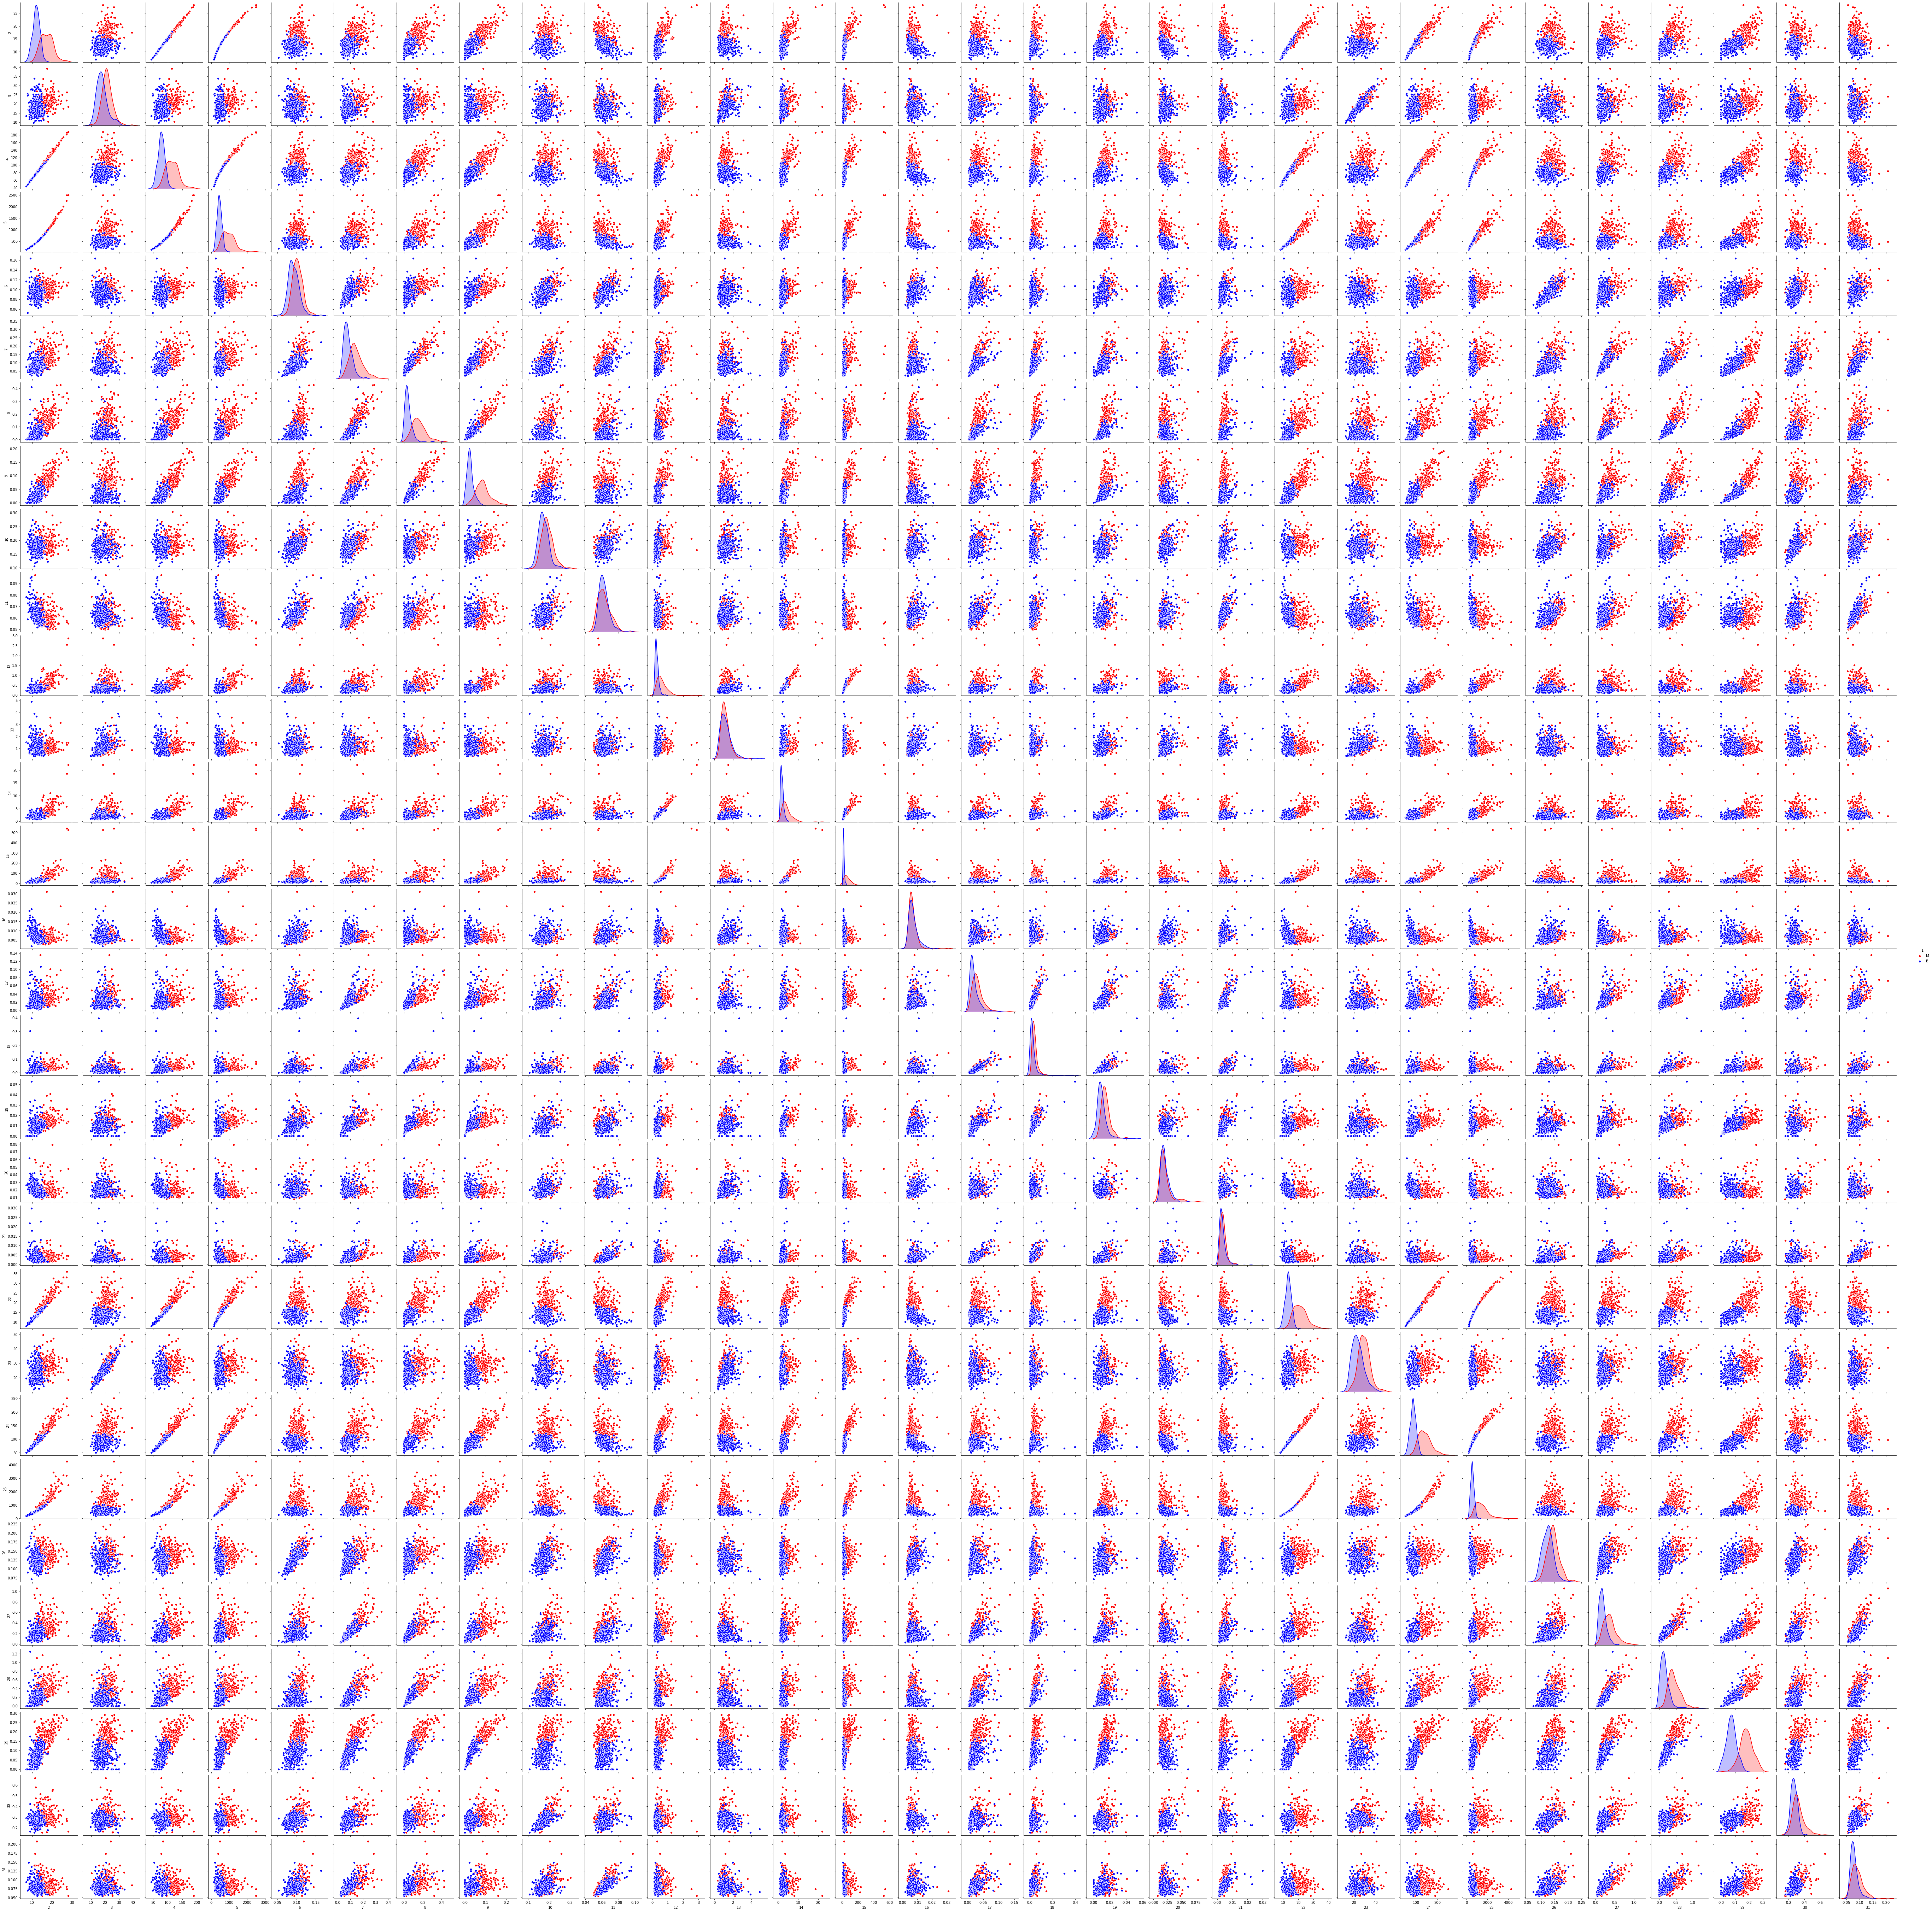

In [10]:
palette = {
    'B': 'blue',
    'M': 'red',
}
sns.pairplot(df,
    hue=1,
    palette=palette)


In addition to the previous comments, it seems that some features are highly correlated :
- 2, 4 and 5
- 22, 24, 25

But as features 5 and 25 don't seem to be linearly correlated to respectively 2 and 4, and 22 and 24, maybe we will keep in the training data.

Another potentially interesting observation is that some features seem to be highly correlated as long as they belong to the 'benign' label :
- 25 and 2, 25 and 4